<a href="https://colab.research.google.com/github/AshbeeKim/dadaiksunTeamProject/blob/main/ipynb/AshbeeKim/EDA%26MODEL_Classfication_Ashbee_Helper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한번에 가즈아222

In [ ]:
# 공유폴더 접근
import os
from google.colab import drive  
from os.path import join

# 구글 드라이브 접근
ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

# 구글 프로젝트 공유 폴더 경로
CO_WORK = "MyDrive/Proj_WT"
CW_PATH = join(ROOT, CO_WORK)

# 데이터_공유 완
DATAS = "DataSets/Seoul"
DATA_PATH = join(CW_PATH, DATAS)

Mounted at /content/drive


In [ ]:
# 기본 모듈
import sys
import re
import random
import time
import warnings
warnings.filterwarnings('ignore')

import csv
import numpy as np
import pandas as pd

from IPython.core.display import display

In [ ]:
# EDA & VSL
!apt-get update -qq
!apt-get install fonts-nanum* -qq
  # 그림그릴때 한글 폰트 깨짐 방지
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

fm._rebuild()

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothic Eco = /usr/share/fonts/truet

In [ ]:
def load_csv(path=None):
  file_list = os.listdir(path)
  file_list = [fpath for fpath in file_list if '(' not in fpath]
  file_list = [fpath for fpath in file_list if '.csv' in fpath]

  dfname_list = []

  for fpath in file_list:
    fname = fpath.split('.')[0]
    dfname_list.append("DF_"+fname) #모델 반복문 돌릴 때 필요한 데이터프레임 변수명 리스트
    try:  # 인코딩 에러 피하기 위한 방법
      globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='euc-kr')
      globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]] #혹시 index도 같이 저장되었으면 없애줌
    except:
      try:
        globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='cp949')
        globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
      except:
        globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='utf-8')
        globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
  return dfname_list

In [ ]:
dflst = load_csv(DATA_PATH)
extract_df = ["DF_Seoul_Weather", "DF_Seoul", "DF_KMAWeatherMonth"]
dflst = [dfname for dfname in dflst if dfname not in extract_df]
dflst

['DF_JongMyo',
 'DF_ChangGyeongGung',
 'DF_ChangDeokGung',
 'DF_NamSanGolHanOkVillage',
 'DF_DuckSooGung',
 'DF_SeoulMuseumOfArt',
 'DF_NationalMuseumOfKorea',
 'DF_TaeReungGangNeung',
 'DF_SeoDaeMunNaturalHistoryMuseum',
 'DF_SeoDaeMunPrisonHistoryMuseum',
 'DF_TrickEyeMuseum',
 'DF_HeonLeungInReung',
 'DF_SunReungJungReung',
 'DF_GyeongBokGung']

# Classfication(recomIDX)

In [ ]:
tour_col = []

for df in dflst:
  tour_col.append(eval(f'{df}.columns[-1]'))

tour_col

['종묘',
 '창경궁',
 '창덕궁',
 '남산골한옥마을',
 '덕수궁',
 '서울시립미술관 본관',
 '국립중앙박물관',
 '태릉 ·  강릉 · 조선왕릉전시관',
 '서대문자연사박물관',
 '서대문형무소역사관',
 '트릭아이미술관',
 '헌릉ㆍ인릉',
 '선릉·정릉',
 '경복궁']

In [ ]:
def missing_fillFB(data=None, target_col=None, missing_index=None):
  FrontValue = int(data[target_col][missing_index-12])
  BackValue = int(data[target_col][missing_index+12])
  Cal = int((FrontValue+BackValue)/2) #사람은 소수점이 될 수 없음
  data[target_col][missing_index] = str(Cal)

In [110]:
for (idx, df), tcol in zip(enumerate(dflst), tour_col):
  if idx==0:
    DF_count = pd.DataFrame(eval(f"{df}['{tcol}']"))
  else:
    addSeries = eval(f"{df}['{tcol}']")
    DF_count = pd.concat([DF_count, addSeries], axis=1)
DF_count

,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,경복궁
0,11486,17644,43677,72313,92135,234587,260272,1747,34551,18407,10128,736,13486,141183
1,17078,35708,73330,135771,132920,171376,224691,1943,20934,14387,15695,1730,18578,230814
2,22238,29856,78705,105735,64869,260687,184565,3000,18641,47554,11468,2085,22696,228276
3,30470,70101,129150,176991,85548,56024,240861,8029,24078,66009,11577,5212,43184,349368
4,56106,78017,151833,188983,103100,279310,307969,17108,25593,72267,9507,6201,44836,438567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,29250,55413,70899,73788,149905,273904,478483,7079,37779,106315,7269,3928,29629,260658
104,12956,88586,159379,142530,181790,130096,244301,8488,15771,97723,2437,4356,32549,494024
105,30737,92701,195038,163316,280107,123357,289342,26628,21167,127285,4148,8726,56195,464290
106,44043,85831,162858,125777,222529,57786,197011,8802,19904,62358,2920,5719,30117,327614


## Quriousity 1. 0.75? 0.5?

In [120]:
import math
import statistics
# 우리는 왜 75%로 나누는가?
IDX_Thres = DF_count.describe().T.loc[:, ['mean', '50%', '75%']]
IDX_Thres

,mean,50%,75%
종묘,24405.962963,18579.5,29555.00
창경궁,58879.481481,52104.5,83133.50
창덕궁,99045.777778,79531.5,140172.25
남산골한옥마을,113289.962963,108898.0,147699.75
덕수궁,106036.601852,98479.5,128560.50
서울시립미술관 본관,105697.018519,84795.5,139238.25
국립중앙박물관,263243.768519,243107.0,295348.75
태릉 · 강릉 · 조선왕릉전시관,6749.833333,4967.5,8856.50
서대문자연사박물관,27622.777778,26717.0,30221.50
서대문형무소역사관,52372.259259,48107.0,71996.25


In [136]:
IDX_Thres['mean-50%'] = IDX_Thres['mean']-IDX_Thres['50%']
IDX_Thres['75%-mean'] = IDX_Thres['75%']-IDX_Thres['mean']
# 평균값과 50%차이가 평균값과 75%의 차이보다 작을 때
IDX_Thres['CompD50%<D75%'] = ['50%' if q5<q7 else '75%' for q5, q7 in zip(IDX_Thres['mean-50%'], IDX_Thres['75%-mean'])]
# 평균값과 75%차이가 평균값과 50%의 차이보다 작을 때
IDX_Thres['CompD50%>D75%'] = ['50%' if q5>q7 else '75%' for q5, q7 in zip(IDX_Thres['mean-50%'], IDX_Thres['75%-mean'])]
IDX_Thres

,mean,50%,75%,mean-50%,75%-mean,Compared,CompD50%<D75%,CompD50%>D75%
종묘,24405.962963,18579.5,29555.00,5826.462963,5149.037037,75%,75%,50%
창경궁,58879.481481,52104.5,83133.50,6774.981481,24254.018519,50%,50%,75%
창덕궁,99045.777778,79531.5,140172.25,19514.277778,41126.472222,50%,50%,75%
남산골한옥마을,113289.962963,108898.0,147699.75,4391.962963,34409.787037,50%,50%,75%
덕수궁,106036.601852,98479.5,128560.50,7557.101852,22523.898148,50%,50%,75%
서울시립미술관 본관,105697.018519,84795.5,139238.25,20901.518519,33541.231481,50%,50%,75%
국립중앙박물관,263243.768519,243107.0,295348.75,20136.768519,32104.981481,50%,50%,75%
태릉 · 강릉 · 조선왕릉전시관,6749.833333,4967.5,8856.50,1782.333333,2106.666667,50%,50%,75%
서대문자연사박물관,27622.777778,26717.0,30221.50,905.777778,2598.722222,50%,50%,75%
서대문형무소역사관,52372.259259,48107.0,71996.25,4265.259259,19623.990741,50%,50%,75%


In [141]:
print(f'{len([chk for chk in IDX_Thres["CompD50%<D75%"].values if chk=="50%"])}((평균값-50%)<(75%-평균값))\n{"-"*25}\n14(총 관광지 수)')

12((평균값-50%)<(75%-평균값))
-------------------------
14(총 관광지 수)


quantile(0.75)?

quantile(0.5)?

$ 추천지수 = \frac{실제값}{75\% 값} $


In [ ]:
def RecomIDX(data=None, col=None):
  # col = target
  recommendINDEX = pd.Series(data[col].apply(lambda x : x/data[col].quantile(0.75)), name=f'RecomIDX_{col}')
  return recommendINDEX

In [ ]:
for (idx, df), tcol in zip(enumerate(dflst), tour_col):
  if idx==0:
    DF_recom = pd.DataFrame(RecomIDX(globals()[f'{df}'], tcol))
  else:
    addSeries = RecomIDX(globals()[f'{df}'], tcol)
    DF_recom = pd.concat([DF_recom, addSeries], axis=1)
DF_recom

,RecomIDX_종묘,RecomIDX_창경궁,RecomIDX_창덕궁,RecomIDX_남산골한옥마을,RecomIDX_덕수궁,RecomIDX_서울시립미술관 본관,RecomIDX_국립중앙박물관,RecomIDX_태릉 · 강릉 · 조선왕릉전시관,RecomIDX_서대문자연사박물관,RecomIDX_서대문형무소역사관,RecomIDX_트릭아이미술관,RecomIDX_헌릉ㆍ인릉,RecomIDX_선릉·정릉,RecomIDX_경복궁
0,0.388631,0.212237,0.311595,0.489595,0.716666,1.684788,0.881236,0.197256,1.143259,0.255666,0.881060,0.159023,0.355608,0.391590
1,0.577838,0.429526,0.523142,0.919236,1.033910,1.230811,0.760765,0.219387,0.692686,0.199830,1.365347,0.373791,0.489878,0.640193
2,0.752428,0.359133,0.561488,0.715878,0.504580,1.872237,0.624905,0.338734,0.616813,0.660507,0.997629,0.450494,0.598464,0.633153
3,1.030959,0.843234,0.921366,1.198316,0.665430,0.402361,0.815514,0.906566,0.796718,0.916839,1.007112,1.126128,1.138706,0.969018
4,1.898359,0.938454,1.083189,1.279508,0.801957,2.005986,1.042730,1.931689,0.846847,1.003761,0.827037,1.339815,1.182267,1.216423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.989680,0.666554,0.505799,0.499581,1.166027,1.967161,1.620061,0.799300,1.250070,1.476674,0.632348,0.848701,0.781278,0.722969
104,0.438369,1.065587,1.137022,0.964998,1.414042,0.934341,0.827161,0.958392,0.521847,1.357335,0.212001,0.941176,0.858275,1.370240
105,1.039993,1.115086,1.391417,1.105730,2.178795,0.885942,0.979662,3.006605,0.700395,1.767939,0.360845,1.885378,1.481789,1.287769
106,1.490205,1.032448,1.161842,0.851572,1.730928,0.415015,0.667045,0.993846,0.658604,0.866128,0.254018,1.235672,0.794146,0.908680


In [ ]:
DF_recom.describe()

,RecomIDX_종묘,RecomIDX_창경궁,RecomIDX_창덕궁,RecomIDX_남산골한옥마을,RecomIDX_덕수궁,RecomIDX_서울시립미술관 본관,RecomIDX_국립중앙박물관,RecomIDX_태릉 · 강릉 · 조선왕릉전시관,RecomIDX_서대문자연사박물관,RecomIDX_서대문형무소역사관,RecomIDX_트릭아이미술관,RecomIDX_헌릉ㆍ인릉,RecomIDX_선릉·정릉,RecomIDX_경복궁
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.825781,0.708252,0.706600,0.767029,0.824799,0.759109,0.891298,0.762133,0.914011,0.727430,0.835922,0.746849,0.738681,0.786253
std,0.538050,0.421128,0.398538,0.321861,0.461372,0.454122,0.282582,0.659060,0.290353,0.420406,0.661356,0.420560,0.316988,0.345669
min,0.169717,0.189118,0.200189,0.282032,0.287024,0.199708,0.292752,0.054875,0.000000,0.136410,0.150758,0.159023,0.212004,0.293239
25%,0.459448,0.352490,0.385265,0.473547,0.514777,0.427329,0.707126,0.255942,0.762437,0.386909,0.428829,0.365419,0.454438,0.535299
50%,0.628642,0.626757,0.567384,0.737293,0.766017,0.608996,0.823118,0.560887,0.884040,0.668188,0.660577,0.679955,0.701724,0.716043
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.491761,2.316491,2.476296,1.487159,3.841981,2.292840,1.877086,3.006605,2.113628,1.776287,4.395555,1.885378,1.487828,2.358920


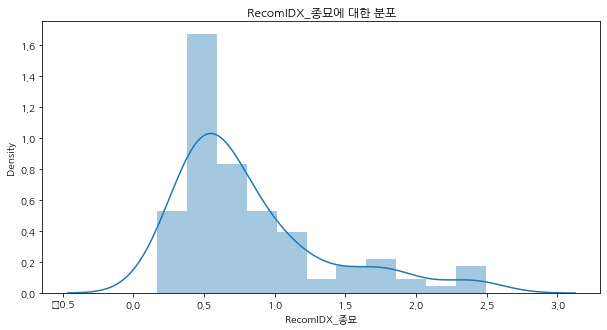

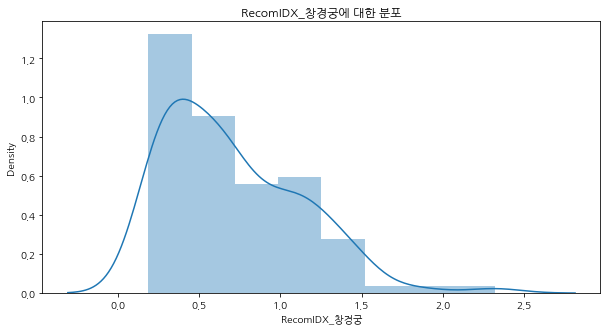

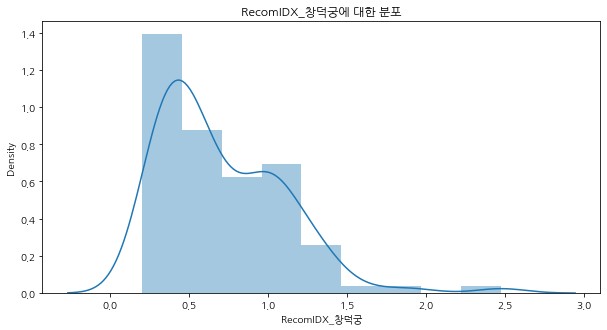

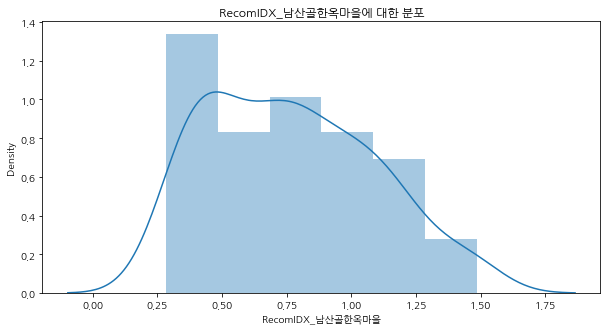

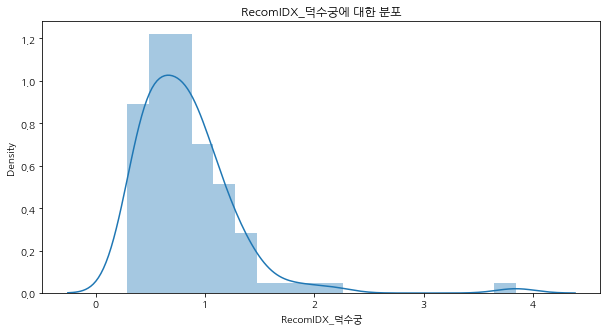

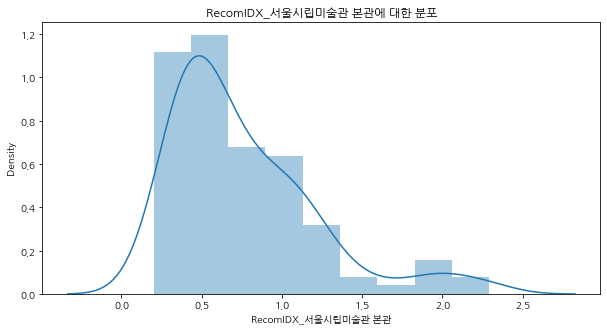

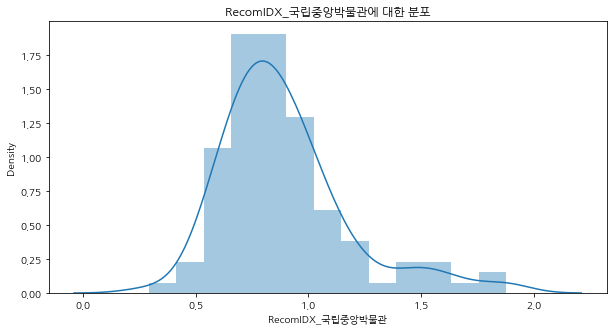

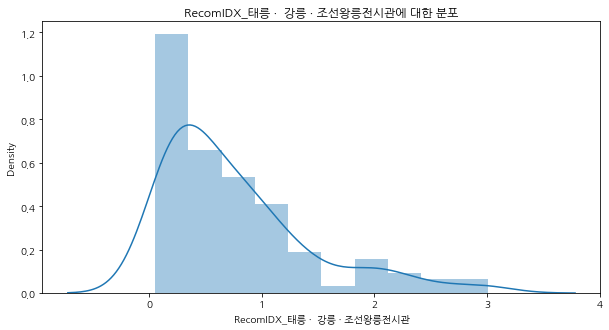

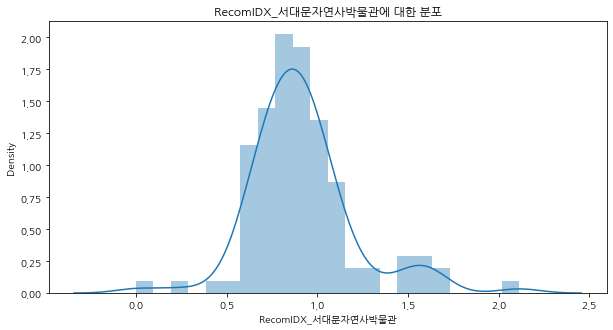

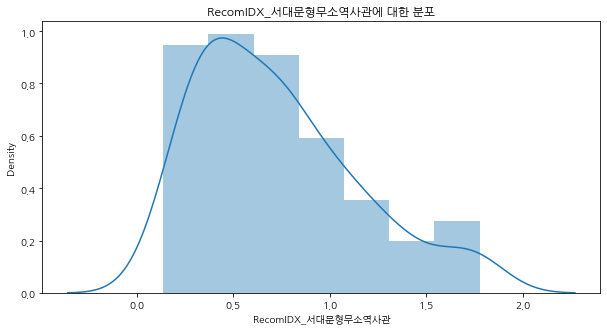

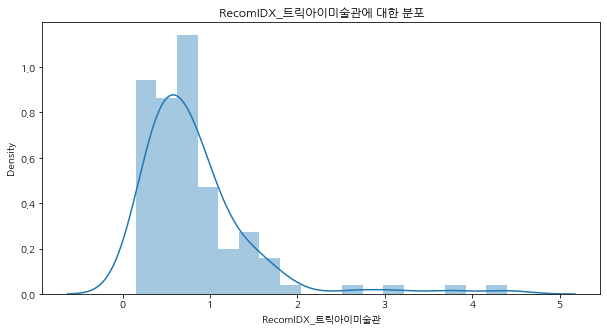

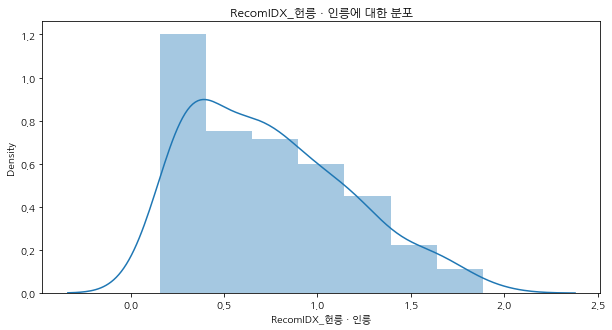

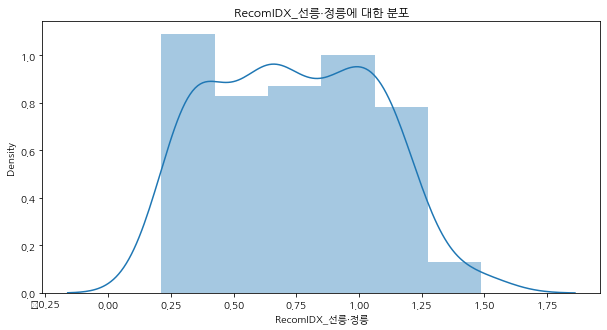

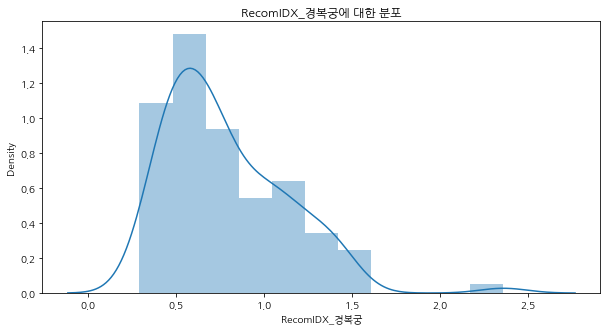

In [ ]:
for rcol in DF_recom.columns:
  fig, ax = plt.subplots(figsize = (10, 5))
  sns.distplot(DF_recom[rcol])
  plt.rc('font', family='NanumGothic')
  plt.title(f'{rcol}에 대한 분포')

In [ ]:
DF_recom.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.576301,0.675453,0.691889,0.909876,1.242716,0.878529,0.708021,1.161800,0.924939,1.202430,0.837410,0.528783,0.442888,0.463998,0.549659,0.846685,1.133606,0.842808,0.617773,0.930414,0.672284,1.183414,0.665138,0.472346,0.477785,0.479342,0.590317,0.730826,1.149881,0.727302,0.634603,1.126118,0.923201,0.951592,0.716367,0.506937,0.572827,0.518242,0.747090,0.808113,...,0.853588,1.086970,0.652099,0.439941,0.519565,0.477425,0.572586,0.911102,1.072312,0.816029,0.646033,0.809516,0.711730,1.841459,0.747640,0.507936,0.455986,0.510296,0.614985,0.831558,1.163900,0.758880,0.523974,0.721547,1.167596,1.171910,0.881313,0.595247,0.584499,0.680582,0.753022,0.972326,1.274433,0.840348,0.709275,0.994729,0.928628,1.370525,0.932868,0.603274
std,0.438926,0.354528,0.378258,0.206362,0.415206,0.242014,0.372004,0.668886,0.316061,0.400366,0.196818,0.189788,0.317453,0.314841,0.270886,0.270271,0.325622,0.286186,0.365076,0.925406,0.268244,0.426418,0.183980,0.378083,0.404387,0.382888,0.159907,0.197958,0.410526,0.233316,0.421319,1.068714,0.483507,0.312454,0.245763,0.330306,0.409983,0.339941,0.258375,0.226799,...,0.246632,0.379304,0.189099,0.196581,0.351696,0.270474,0.170774,0.327955,0.520927,0.372991,0.309907,0.374628,0.317993,0.913488,0.197254,0.232016,0.289249,0.202691,0.199526,0.213465,0.258952,0.181408,0.276650,0.501056,0.483617,0.413823,0.477332,0.357530,0.322934,0.300786,0.379955,0.339313,0.438427,0.286191,0.500903,0.444252,0.352316,0.672165,0.393315,0.275802
min,0.159023,0.199830,0.338734,0.402361,0.801957,0.484991,0.249816,0.569750,0.411087,0.551853,0.541862,0.212838,0.102072,0.089877,0.198385,0.465873,0.696287,0.538027,0.229323,0.193530,0.338407,0.496804,0.299404,0.141365,0.145656,0.136410,0.334740,0.338170,0.488149,0.427271,0.177045,0.285892,0.388104,0.199708,0.297409,0.079715,0.102185,0.115847,0.389440,0.440942,...,0.461455,0.592294,0.363541,0.245352,0.187320,0.184610,0.301603,0.355016,0.384277,0.430004,0.311947,0.463829,0.000000,0.476632,0.297688,0.238751,0.115508,0.241743,0.298993,0.291338,0.622779,0.445575,0.242495,0.206402,0.362324,0.436180,0.203997,0.248360,0.195901,0.319426,0.195646,0.150758,0.425306,0.289772,0.347380,0.499581,0.212001,0.360845,0.254018,0.198047
25%,0.269648,0.444614,0.518807,0.822444,0.954781,0.706225,0.412538,0.779841,0.713357,0.900574,0.700374,0.413830,0.230388,0.268477,0.330599,0.727064,0.944389,0.570362,0.338660,0.357429,0.459589,0.931541,0.547379,0.196826,0.212817,0.252995,0.458148,0.627993,0.836444,0.549835,0.346382,0.524925,0.691765,0.799454,0.600850,0.270996,0.323388,0.326777,0.554894,0.667480,...,0.742177,0.834397,0.546618,0.363004,0.313658,0.337167,0.452498,0.730489,0.813341,0.590097,0.409782,0.543665,0.556047,1.217986,0.626590,0.327519,0.264038,0.343096,0.500973,0.743125,1.009118,0.620875,0.311463,0.306258,0.898640,1.026314,0.653665,0.312279,0.328167,0.419994,0.537253,0.837527,1.044202,0.667434,0.420709,0.680658,0.834940,0.994745,0.698821,0.366549
50%,0.390110,0.609015,0.620859,0.9

In [ ]:
DF_recom.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107
RecomIDX_종묘,0.388631,0.577838,0.752428,1.030959,1.898359,0.952259,0.875859,1.135510,1.195398,1.534055,1.271494,0.819591,0.198139,0.169717,0.725055,0.927457,0.941397,0.549755,0.419557,0.417696,0.443952,0.742886,0.537337,0.272983,0.236711,0.262121,0.444527,0.522551,1.818982,0.427271,0.310167,0.577466,0.689630,0.763052,0.639350,0.470174,0.487870,0.416410,0.545288,0.607613,...,0.809339,0.816173,0.564304,0.391643,0.432177,0.331890,0.527187,0.715750,2.389579,1.888750,0.797226,0.505803,0.647843,2.371274,0.914160,0.544409,0.427440,0.607511,0.652546,0.740078,1.596278,0.587515,0.314397,1.106852,2.415057,1.720149,2.197801,1.538454,1.224125,1.374522,1.089088,1.140044,1.812147,0.889765,0.521232,0.989680,0.438369,1.039993,1.490205,1.174454
RecomIDX_창경궁,0.212237,0.429526,0.359133,0.843234,0.938454,0.484991,0.376900,0.588391,0.698587,1.177251,0.742144,0.255817,0.210000,0.243789,0.332561,0.913422,0.965519,0.569061,0.315649,0.323359,0.506499,1.514504,0.635484,0.189118,0.211251,0.252485,0.437718,0.755532,1.439071,0.612136,0.300661,0.398275,0.684610,1.249893,0.733495,0.240998,0.261170,0.441711,0.539373,1.079432,...,0.939573,1.459712,0.725604,0.245352,0.296511,0.265561,0.450649,1.428762,1.155334,0.640548,0.598134,0.487974,0.526875,2.316491,0.816049,0.304173,0.218781,0.541310,0.505308,0.984525,1.173402,0.599662,0.266042,0.261940,1.526485,1.128618,0.852785,0.248360,0.392032,0.829365,0.656282,1.209753,1.133839,0.628206,0.361972,0.666554,1.065587,1.115086,1.032448,0.298676
RecomIDX_창덕궁,0.311595,0.523142,0.561488,0.921366,1.083189,0.772350,0.652961,0.958635,1.023505,1.587219,1.147417,0.542126,0.226578,0.266287,0.360792,0.725807,0.953363,0.543018,0.349449,0.377222,0.546899,1.029219,0.639035,0.200189,0.217518,0.263283,0.385626,0.724166,1.896203,0.593106,0.347123,0.489191,0.698170,1.031224,0.769796,0.275040,0.345874,0.319293,0.451024,1.040391,...,0.999463,1.302833,1.023605,0.371557,0.405137,0.358259,0.515630,1.205574,1.047162,0.573280,0.376230,0.463829,0.709349,2.476296,1.106439,0.397190,0.289986,0.486409,0.499528,0.952792,0.914132,0.489590,0.242495,0.263026,1.174698,1.159309,0.925597,0.277402,0.273984,0.556658,0.529285,0.930184,1.024069,0.593092,0.347380,0.505799,1.137022,1.391417,1.161842,0.384184
RecomIDX_남산골한옥마을,0.489595,0.919236,0.715878,1.198316,1.279508,1.110706,0.899751,1.100388,1.473943,1.383313,0.984084,0.751430,0.714212,0.666738,0.778803,1.457944,1.487159,1.232453,1.060970,1.057212,1.183001,1.397653,0.828783,0.609602,0.474706,0.791897,0.735939,1.136684,1.139156,1.004931,0.925134,1.088208,1.482934,1.239535,0.856386,0.994098,0.315992,0.342932,1.168255,0.853664,...,0.644944,0.773508,0.418877,0.296548,0.301829,0.353000,0.402756,0.661030,0.617076,0.461260,0.341402,0.561267,0.952656,1.218100,0.609046,0.429506,0.341808,0.498816,0.664260,0.930157,0.998356,0.725533,0.403684,0.388863,1.278926,1.144477,0.735763,0.476636,0.437821,0.570407,0.622506,1.059609,1.052764,0.796217,0.512283,0.499581,0.964998,1.105730,0.851572,0.463508
RecomIDX_덕수궁,0.716666,1.033910,0.504580,0.665430,0.801957,0.633857,0.634285,0.906593,0.998308,1.072413,0.835925,0.405568,0.311456,0.287024,0.313035,0.515290,0.696287,0.538027,0.335064,0.350831,0.381245,1.119629,0.756383,0.348902,0.365431,0.364225,0.604525,0.749857,0.801187,0.494086,0.380685,0.507411,0.759627,0.964013,1.294068,0.772407,0.866907,0.725316,1.127119,0.670906,...,1.343469,1.173541,0.785793,0.410678,0.539839,0.527689,0.530528,0.939169,1.124824,0.676880,0.513237,0.596847,1.039355,3.841981,0.946869,0.561946,0.501367,0.552339,0.780341,0.863259,1.257952,0.749033,0.488976,0.539022,1.431832,1.396191,1.101816,1.005075,0.855084,0.962636,1.119543,1.550406,1.916110,1.325633,0.812520,1.166027,1.414042,2.178795,1.730928,0.873628
RecomIDX_서울시립미술관 본관,1.684788,1.230811,1.872237,0.402361,2.005986,1.28

* 방법 1: 전체 rank가 기록된 데이터를 새로 만든다
* 방법 2: 14개의 관광지, 1-5(2:highly recommend), 6-10(1:recommend), 11-(0:hardly recommend)로 분류한다.

-----

어차피 다해야 함

In [ ]:
Rank_chk = DF_recom.T
Rank_chk.columns

RangeIndex(start=0, stop=108, step=1)

In [ ]:
for idx in range(108):
  if idx==0:
    DF_rank = pd.DataFrame(Rank_chk[idx].rank(method='dense', ascending=False), dtype='int64')
  else:
    addSeries = Rank_chk[idx].rank(method='dense', ascending=False) # 같은 지수면 중복값 허용, 지수가 높을 수록 상위 순우
    DF_rank = pd.concat([DF_rank, addSeries], axis=1)
    DF_rank.iloc[:,-1] = DF_rank.iloc[:,-1].astype('int64')

In [ ]:
DF_rank = DF_rank.T

ocol = [col for col in DF_rank.columns]
ncol = {}
for o, n in zip(ocol, tour_col):
  ncol[o] = 'Rank_'+n
DF_rank.rename(columns=ncol, inplace=True)

DF_rank

,Rank_종묘,Rank_창경궁,Rank_창덕궁,Rank_남산골한옥마을,Rank_덕수궁,Rank_서울시립미술관 본관,Rank_국립중앙박물관,Rank_태릉 · 강릉 · 조선왕릉전시관,Rank_서대문자연사박물관,Rank_서대문형무소역사관,Rank_트릭아이미술관,Rank_헌릉ㆍ인릉,Rank_선릉·정릉,Rank_경복궁
0,8,12,10,6,5,1,3,13,2,11,4,14,9,7
1,8,11,9,4,3,2,5,13,6,14,1,12,10,7
2,3,13,10,4,11,1,7,14,8,5,2,12,9,6
3,4,10,7,1,13,14,11,9,12,8,5,3,2,6
4,3,11,8,5,14,1,9,2,12,10,13,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,6,11,13,14,5,1,2,8,4,3,12,7,9,10
104,13,5,4,6,1,9,11,7,12,3,14,8,10,2
105,10,8,6,9,2,12,11,1,13,4,14,3,5,7
106,2,5,4,9,1,13,11,6,12,8,14,3,10,7


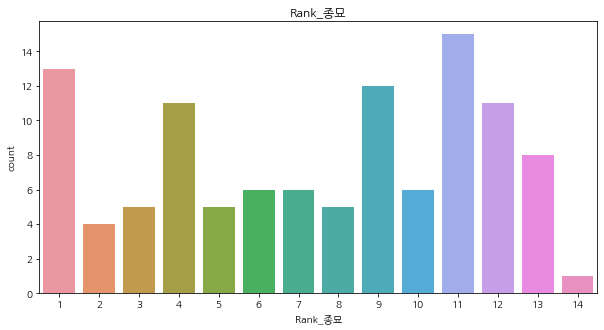

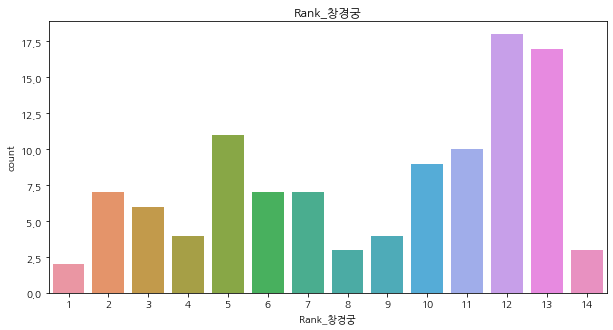

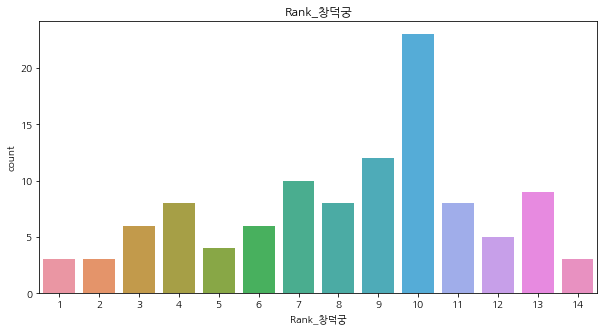

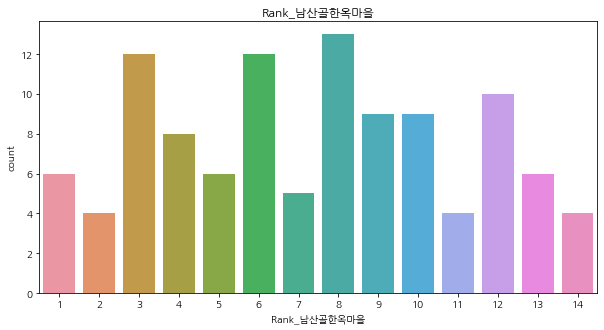

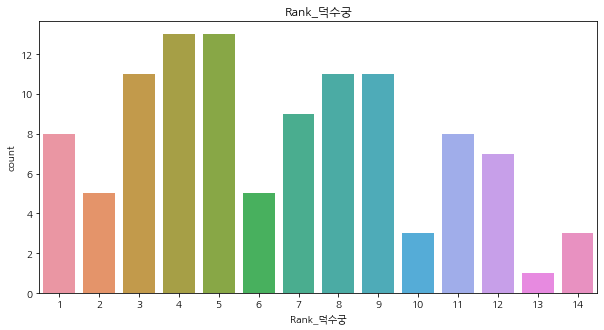

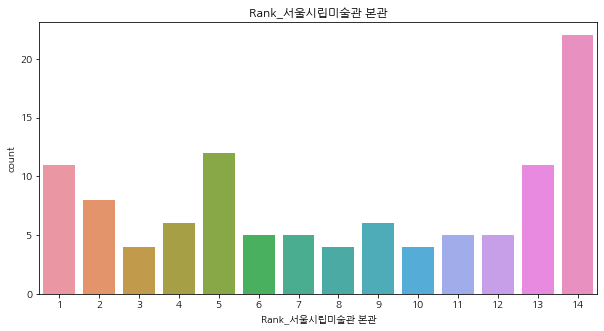

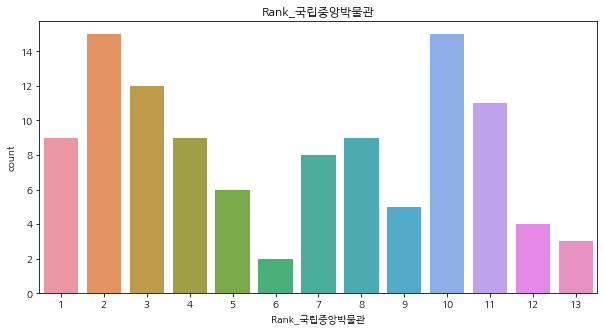

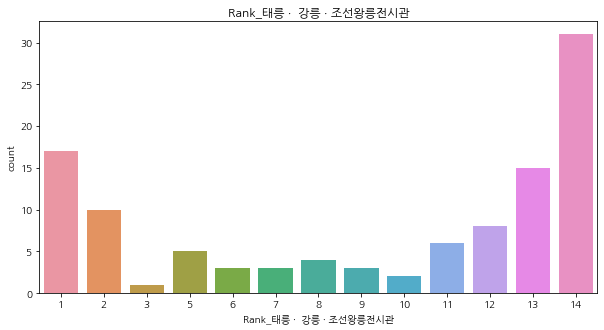

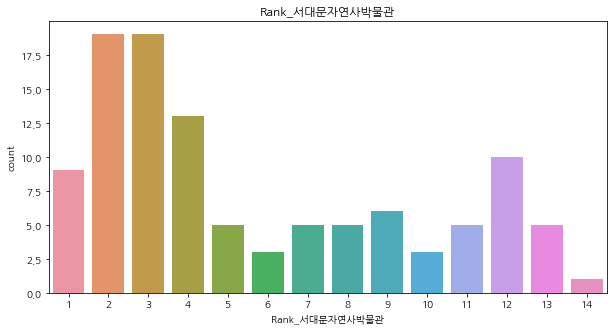

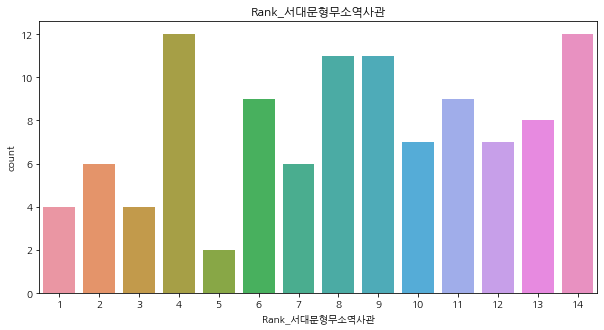

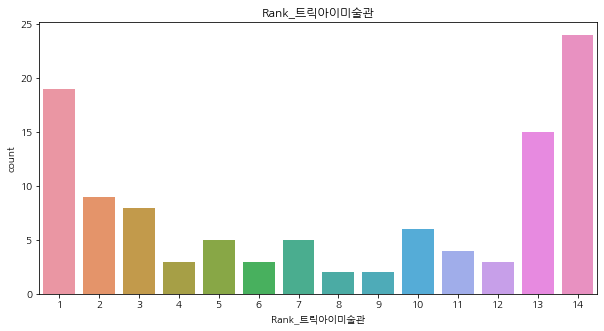

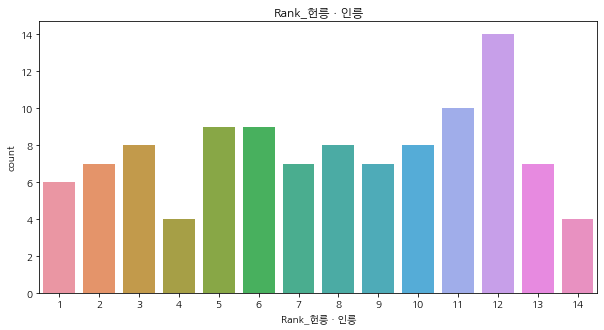

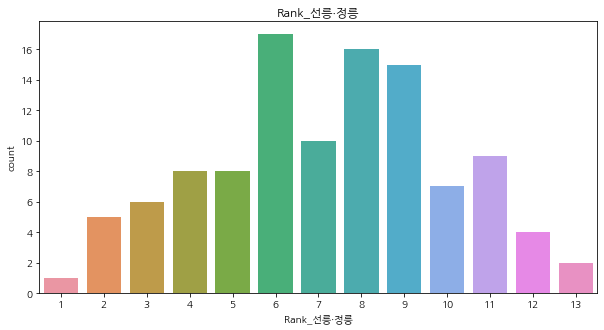

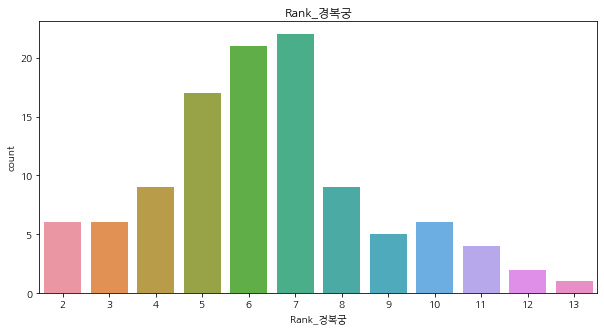

In [ ]:
for rcol in DF_rank.columns:
  fig, ax = plt.subplots(figsize = (10, 5))
  sns.countplot(DF_rank[rcol])
  plt.rc('font', family='NanumGothic')
  plt.title(f'{rcol}')

다 고르게 들어간 것 같기는 한데,,, 여기서 binning을 한다면??

In [ ]:
DF_rank.T.index[0].strip('Rank_')

'종묘'

In [ ]:
top_chk = DF_rank.T

top5 = []
top6to10 = []
outofrange = []

for col in range(108):
  r5 = []
  r6to10 = []
  rextra = []
  for idx, rank in enumerate(top_chk[col]):
    if rank<=5:
      r5.append(top_chk.index[idx].strip('Rank_'))
    elif (rank>5) and (rank<=10):
      r6to10.append(top_chk.index[idx].strip('Rank_'))
    elif rank>10:
      rextra.append(top_chk.index[idx].strip('Rank_'))
  top5.append(r5)
  top6to10.append(r6to10)
  outofrange.append(rextra)

In [ ]:
top5

[['덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서대문자연사박물관', '트릭아이미술관'],
 ['남산골한옥마을', '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '트릭아이미술관'],
 ['종묘', '남산골한옥마을', '서울시립미술관 본관', '서대문형무소역사관', '트릭아이미술관'],
 ['종묘', '남산골한옥마을', '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉'],
 ['종묘', '남산골한옥마을', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉'],
 ['남산골한옥마을', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉', '선릉·정릉'],
 ['종묘', '남산골한옥마을', '국립중앙박물관', '서대문자연사박물관', '트릭아이미술관'],
 ['종묘', '국립중앙박물관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관'],
 ['종묘', '남산골한옥마을', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['종묘', '창덕궁', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉', '경복궁'],
 ['종묘', '창덕궁', '남산골한옥마을', '서대문자연사박물관', '선릉·정릉'],
 ['종묘', '남산골한옥마을', '국립중앙박물관', '서대문자연사박물관', '경복궁'],
 ['남산골한옥마을', '서울시립미술관 본관', '국립중앙박물관', '서대문자연사박물관', '트릭아이미술관'],
 ['남산골한옥마을', '국립중앙박물관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관'],
 ['종묘', '남산골한옥마을', '서대문자연사박물관', '트릭아이미술관', '경복궁'],
 ['남산골한옥마을', '서대문자연사박물관', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['남산골한옥마을', '서대문형무소역사관', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['남산골한옥마을', '서울시립미술관 본관', '서대문자연사박물관', '서대문형무소역사관', 

In [ ]:
top6to10

[['종묘', '창덕궁', '남산골한옥마을', '선릉·정릉', '경복궁'],
 ['종묘', '창덕궁', '서대문자연사박물관', '선릉·정릉', '경복궁'],
 ['창덕궁', '국립중앙박물관', '서대문자연사박물관', '선릉·정릉', '경복궁'],
 ['창경궁', '창덕궁', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '경복궁'],
 ['창덕궁', '국립중앙박물관', '서대문형무소역사관', '선릉·정릉', '경복궁'],
 ['종묘', '창덕궁', '국립중앙박물관', '서대문자연사박물관', '서대문형무소역사관'],
 ['창덕궁', '덕수궁', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['창덕궁', '남산골한옥마을', '덕수궁', '선릉·정릉', '경복궁'],
 ['창덕궁', '덕수궁', '국립중앙박물관', '태릉 ·  강릉 · 조선왕릉전시관', '트릭아이미술관'],
 ['창경궁', '남산골한옥마을', '덕수궁', '서대문자연사박물관', '선릉·정릉'],
 ['창경궁', '덕수궁', '서울시립미술관 본관', '헌릉ㆍ인릉', '경복궁'],
 ['창덕궁', '서울시립미술관 본관', '서대문형무소역사관', '트릭아이미술관', '선릉·정릉'],
 ['덕수궁', '서대문형무소역사관', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['덕수궁', '서울시립미술관 본관', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['창경궁', '창덕궁', '국립중앙박물관', '헌릉ㆍ인릉', '선릉·정릉'],
 ['종묘', '창경궁', '국립중앙박물관', '서대문형무소역사관', '트릭아이미술관'],
 ['창경궁', '창덕궁', '서울시립미술관 본관', '국립중앙박물관', '트릭아이미술관'],
 ['국립중앙박물관', '태릉 ·  강릉 · 조선왕릉전시관', '트릭아이미술관', '선릉·정릉', '경복궁'],
 ['종묘', '창덕궁', '헌릉ㆍ인릉', '선릉·정릉', '경복궁'],
 ['종묘', '창덕궁', '남산골한옥마을', '선릉·정릉', '경복궁'],
 ['창경

In [ ]:
outofrange

[['창경궁', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '헌릉ㆍ인릉'],
 ['창경궁', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '헌릉ㆍ인릉'],
 ['창경궁', '덕수궁', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉'],
 ['덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서대문자연사박물관'],
 ['창경궁', '덕수궁', '서대문자연사박물관', '트릭아이미술관'],
 ['창경궁', '덕수궁', '트릭아이미술관', '경복궁'],
 ['창경궁', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관'],
 ['창경궁', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉'],
 ['창경궁', '서울시립미술관 본관', '서대문자연사박물관', '서대문형무소역사관'],
 ['서울시립미술관 본관', '국립중앙박물관', '서대문형무소역사관', '트릭아이미술관'],
 ['국립중앙박물관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '트릭아이미술관'],
 ['창경궁', '덕수궁', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉'],
 ['종묘', '창경궁', '창덕궁', '태릉 ·  강릉 · 조선왕릉전시관'],
 ['종묘', '창경궁', '창덕궁', '태릉 ·  강릉 · 조선왕릉전시관'],
 ['덕수궁', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관'],
 ['창덕궁', '덕수궁', '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관'],
 ['종묘', '덕수궁', '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관'],
 ['종묘', '창경궁', '창덕궁', '덕수궁'],
 ['창경궁', '덕수궁', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관'],
 ['창경궁', '덕수궁', '태릉 ·  강릉 · 조선왕릉전시관', '헌릉ㆍ인릉'],
 ['종묘', '덕수궁'

## hypothesis 1. 지수->순위->추천범위

-----

* top5 -> 2: highly recommend
* top6to10 -> 1: recommend
* outofrange -> 0: hardly recommend

In [167]:
whole = []
for idx in range(108):
  row_list = []
  if idx==0:
    for cnt, col in enumerate(tour_col):
      if col in top5[idx]:
        row_list.append(2)
      elif col in top6to10[idx]:
        row_list.append(1)
      elif col in outofrange[idx]:
        row_list.append(0)
    whole.append(row_list)
  else:
    for cnt, col in enumerate(tour_col):
      if col in top5[idx]:
        row_list.append(2)
      elif col in top6to10[idx]:
        row_list.append(1)
      elif col in outofrange[idx]:
        row_list.append(0)
    whole.append(row_list)

DF_RCIDX = pd.DataFrame(whole, columns=tour_col)
DF_RCIDX

,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,경복궁
0,1,0,1,1,2,2,2,0,2,0,2,0,1,1
1,1,0,1,2,2,2,2,0,1,0,2,0,1,1
2,2,0,1,2,0,2,1,0,1,2,2,0,1,1
3,2,1,1,2,0,0,0,1,0,1,2,2,2,1
4,2,0,1,2,0,2,1,2,0,1,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,0,0,0,2,2,2,1,2,2,0,1,1,1
104,0,2,2,1,2,1,0,1,0,2,0,1,1,2
105,1,1,1,1,2,0,0,2,0,2,0,2,2,1
106,2,2,2,1,2,0,0,1,0,1,0,2,1,1


In [175]:
recom_list = []

for idx, df in enumerate(dflst):
  WT = eval(f'{df}.iloc[:,:-1]')
  RC = DF_RCIDX.iloc[:,idx]
  recom_list.append('RC_'+df.strip('DF_'))
  globals()[f'RC_{df.strip("DF_")}'] = pd.concat([WT, RC], axis=1)

In [177]:
for rc in recom_list:
  print(eval(f'{rc}.iloc[:, -1].unique()'))

[1 2 0]
[0 1 2]
[1 2 0]
[1 2 0]
[2 0 1]
[2 0 1]
[2 1 0]
[0 1 2]
[2 1 0]
[0 2 1]
[2 0 1]
[0 2 1]
[1 2 0]
[1 0 2]


전체 데이터 모두 지수화된 추천 여부 정보는 입력되었음

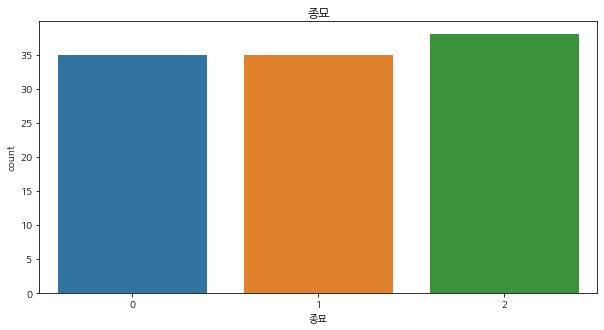

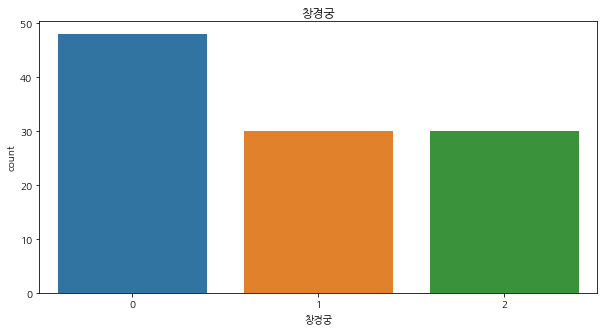

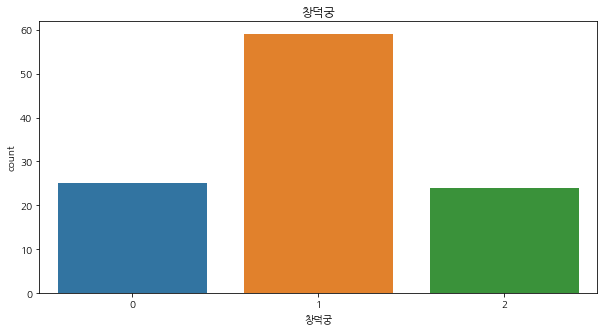

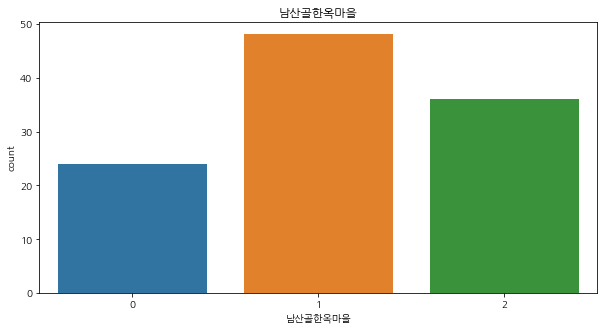

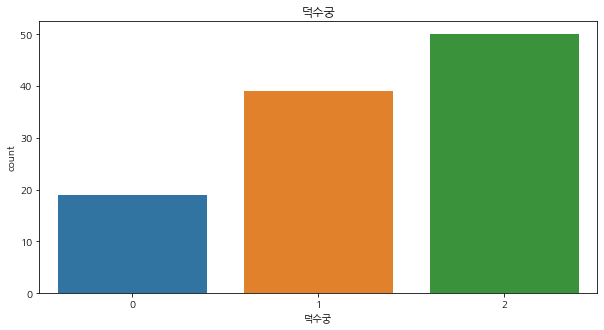

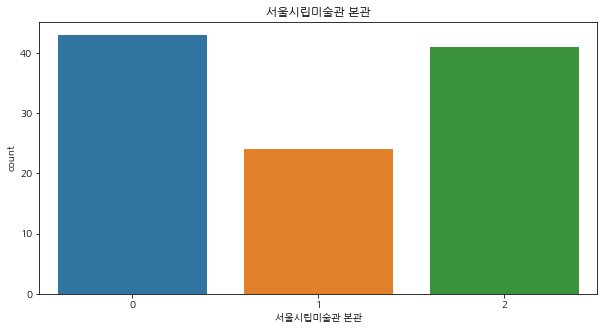

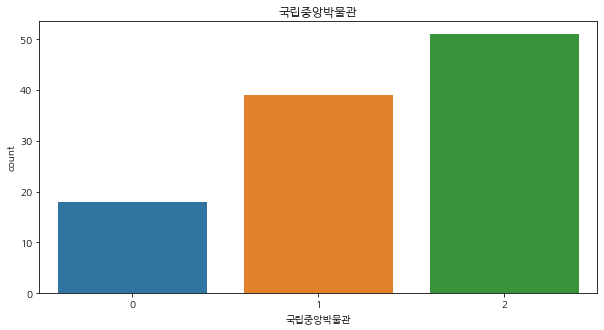

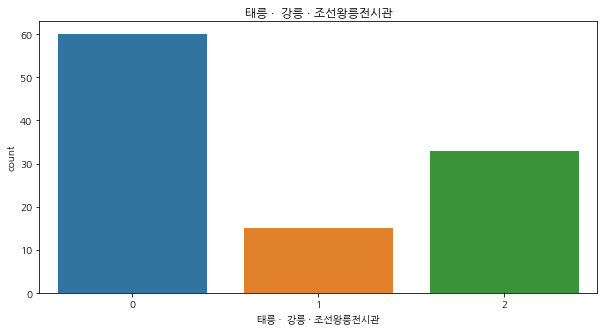

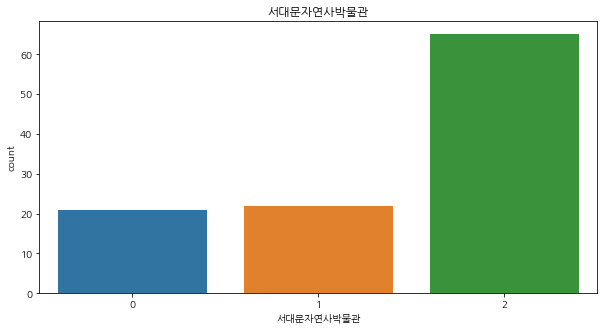

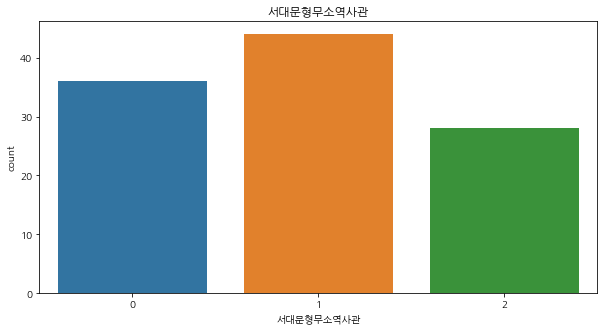

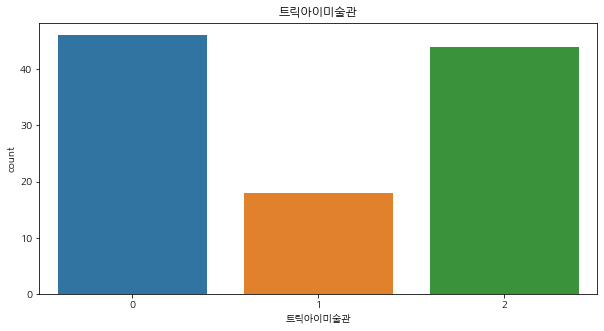

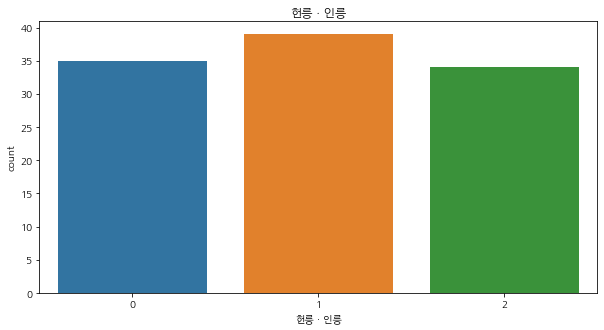

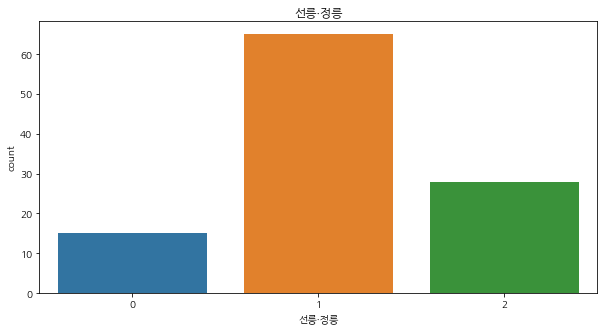

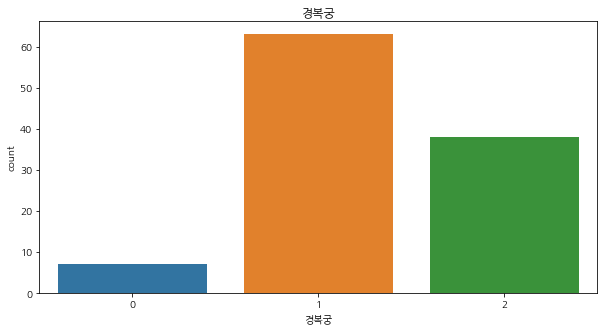

In [179]:
for rc, tcol in zip(recom_list, tour_col):
  fig, ax = plt.subplots(figsize = (10, 5))
  sns.countplot(eval(f'{rc}')[tcol])
  plt.rc('font', family='NanumGothic')
  plt.title(f'{tcol}')

## hypothesis 2. 지수? 관광객수? 둘다? 아니면 rank만?

-----

지수화를 먼저 한다면, 검증 부분이 약할 수 있음 -> ㅇㅇ

그렇다면 지수화->rank->topK, count->rank->topK를 가지고 멀티class를 사용하는 방법은 어떠한가?

비교? 아니면 그냥 dim을 높이는 방법?

일단 생각 좀....

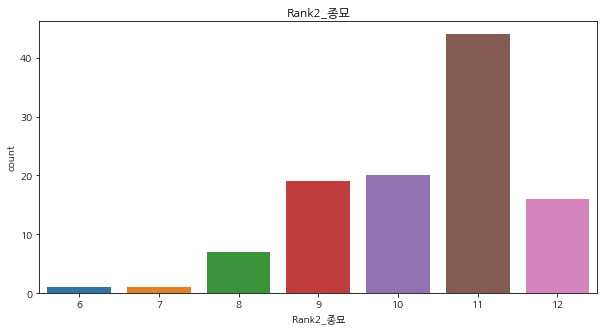

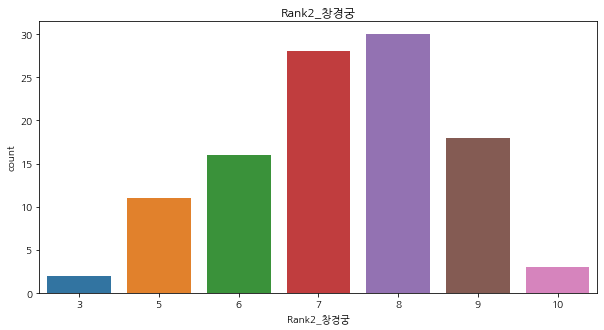

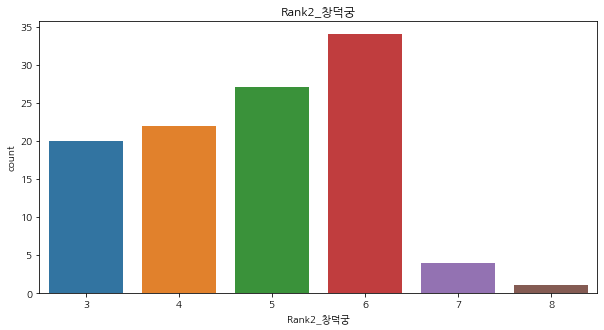

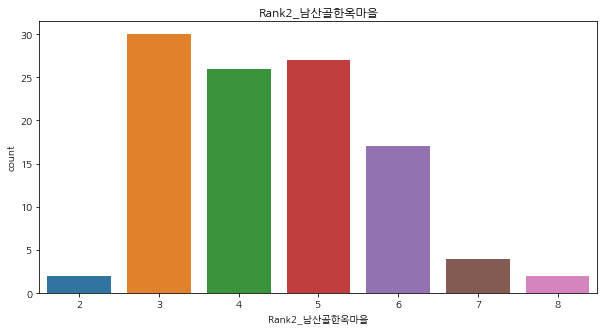

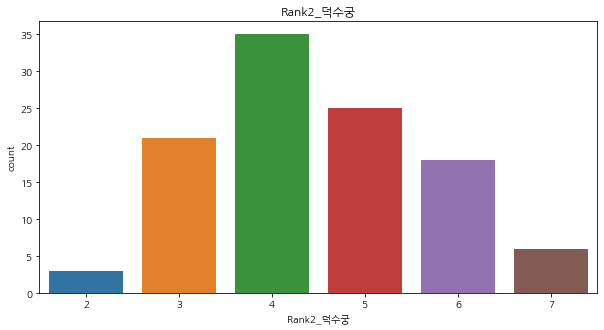

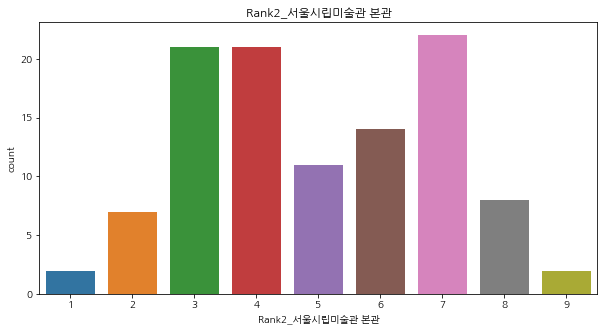

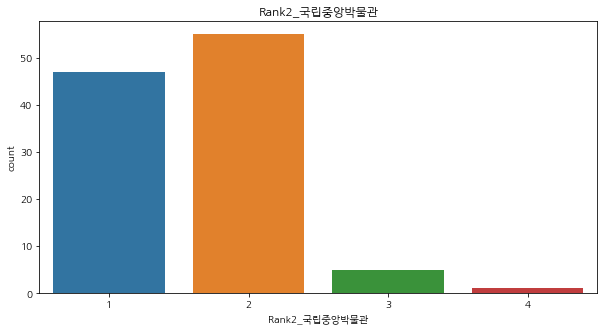

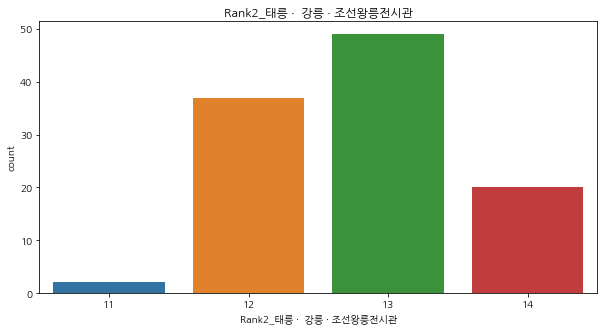

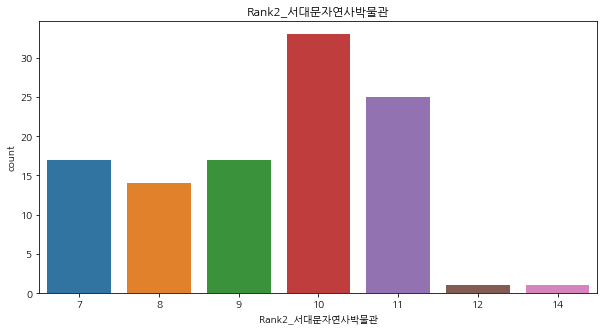

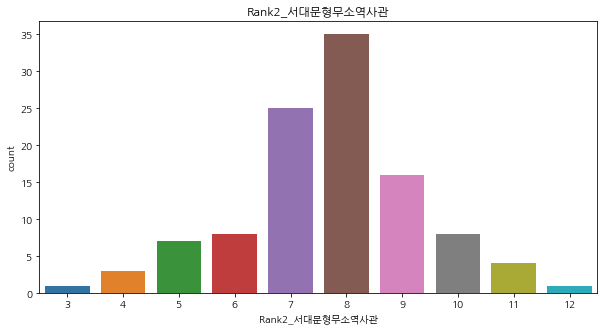

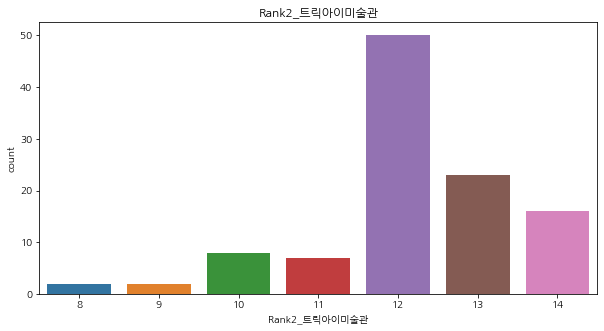

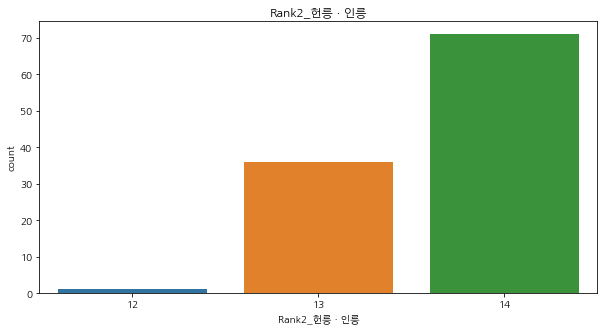

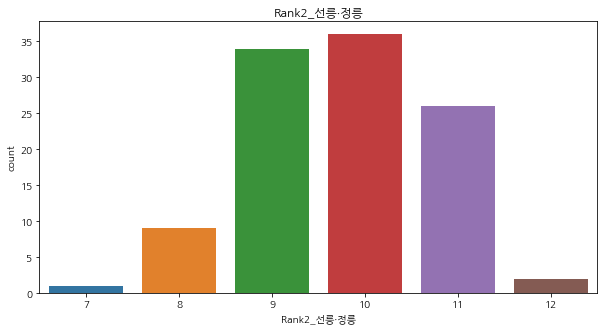

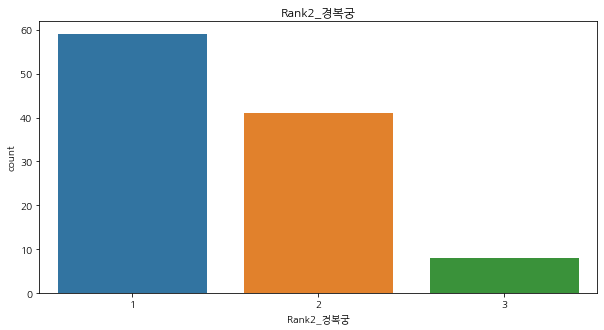

In [202]:
# Index->rank->topK->binning : recom_lsit 반복문으로 불러오면 됨
# Index->rank->topK->binning : recom_lsit2 반복문으로 불러오면 됨

Rank_chk2 = DF_count.T
Rank_chk2.columns

for idx in range(108):
  if idx==0:
    DF_rank2 = pd.DataFrame(Rank_chk2[idx].rank(method='dense', ascending=False), dtype='int64')
  else:
    addSeries = Rank_chk2[idx].rank(method='dense', ascending=False) # 같은 지수면 중복값 허용, 지수가 높을 수록 상위 순우
    DF_rank2 = pd.concat([DF_rank2, addSeries], axis=1)
    DF_rank2.iloc[:,-1] = DF_rank2.iloc[:,-1].astype('int64')

DF_rank2 = DF_rank2.T

ocol = [col for col in DF_rank2.columns]
ncol = {}
for o, n in zip(ocol, tour_col):
  ncol[o] = 'Rank2_'+n
DF_rank2.rename(columns=ncol, inplace=True)


for rcol in DF_rank2.columns:
  fig, ax = plt.subplots(figsize = (10, 5))
  sns.countplot(DF_rank2[rcol])
  plt.rc('font', family='NanumGothic')
  plt.title(f'{rcol}')


top_chk2 = DF_rank2.T

top5_2 = []
top6to10_2 = []
outofrange_2 = []

for col in range(108):
  r5 = []
  r6to10 = []
  rextra = []
  for idx, rank in enumerate(top_chk2[col]):
    if rank<=5:
      r5.append(top_chk2.index[idx].strip('Rank2_'))
    elif (rank>5) and (rank<=10):
      r6to10.append(top_chk2.index[idx].strip('Rank2_'))
    elif rank>10:
      rextra.append(top_chk2.index[idx].strip('Rank2_'))
  top5_2.append(r5)
  top6to10_2.append(r6to10)
  outofrange_2.append(rextra)

whole2 = []
for idx in range(108):
  row_list2 = []
  if idx==0:
    for cnt, col in enumerate(tour_col):
      if col in top5_2[idx]:
        row_list2.append(2)
      elif col in top6to10_2[idx]:
        row_list2.append(1)
      elif col in outofrange_2[idx]:
        row_list2.append(0)
    whole2.append(row_list2)
  else:
    for cnt, col in enumerate(tour_col):
      if col in top5_2[idx]:
        row_list2.append(2)
      elif col in top6to10_2[idx]:
        row_list2.append(1)
      elif col in outofrange_2[idx]:
        row_list2.append(0)
    whole2.append(row_list2)

DF_RCIDX2 = pd.DataFrame(whole2, columns=tour_col)
DF_RCIDX2

recom_list2 = []

for idx, df in enumerate(dflst):
  WT = eval(f'{df}.iloc[:,:-1]')
  RC = DF_RCIDX2.iloc[:,idx]
  recom_list2.append('RC_'+df.strip('DF_')+'2')
  globals()[f'RC_{df.strip("DF_")}2'] = pd.concat([WT, RC], axis=1)

In [208]:
print('-'*30, ' 지수로 바꾼 데이터의 추천 범위 ', '-'*30)
for rc, tcol in zip(recom_list, tour_col):
  print(f'Tourist Spot : {tcol}\nData Name : {rc}')
  HRecom = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==2].count()
  Recom = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==1].count()
  HDRec = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==0].count()
  print(f'\t총 108개월 중 \n\t\t강력하게 추천하는 개월 수 : {HRecom}\n\t\t추천의 범위에 들어가는 개월 수 : {Recom}\n\t\t추천을 하지 않는 개월 수 : {HDRec}\n')

------------------------------  지수로 바꾼 데이터의 추천 범위  ------------------------------
Tourist Spot : 종묘
Data Name : RC_JongMyo
	총 108개월 중 
		강력하게 추천하는 개월 수 : 38
		추천의 범위에 들어가는 개월 수 : 35
		추천을 하지 않는 개월 수 : 35

Tourist Spot : 창경궁
Data Name : RC_ChangGyeongGung
	총 108개월 중 
		강력하게 추천하는 개월 수 : 30
		추천의 범위에 들어가는 개월 수 : 30
		추천을 하지 않는 개월 수 : 48

Tourist Spot : 창덕궁
Data Name : RC_ChangDeokGung
	총 108개월 중 
		강력하게 추천하는 개월 수 : 24
		추천의 범위에 들어가는 개월 수 : 59
		추천을 하지 않는 개월 수 : 25

Tourist Spot : 남산골한옥마을
Data Name : RC_NamSanGolHanOkVillage
	총 108개월 중 
		강력하게 추천하는 개월 수 : 36
		추천의 범위에 들어가는 개월 수 : 48
		추천을 하지 않는 개월 수 : 24

Tourist Spot : 덕수궁
Data Name : RC_uckSooGung
	총 108개월 중 
		강력하게 추천하는 개월 수 : 50
		추천의 범위에 들어가는 개월 수 : 39
		추천을 하지 않는 개월 수 : 19

Tourist Spot : 서울시립미술관 본관
Data Name : RC_SeoulMuseumOfArt
	총 108개월 중 
		강력하게 추천하는 개월 수 : 41
		추천의 범위에 들어가는 개월 수 : 24
		추천을 하지 않는 개월 수 : 43

Tourist Spot : 국립중앙박물관
Data Name : RC_NationalMuseumOfKorea
	총 108개월 중 
		강력하게 추천하는 개월 수 : 51
		추천의 범위에 들어가는 개월 수 : 39
		추천을

In [204]:
for rc in recom_list2:
  print(eval(f'{rc}.iloc[:, -1].unique()'))

[0 1]
[1 2]
[1 2]
[2 1]
[2 1]
[2 1]
[2]
[0]
[1 0]
[1 0 2]
[0 1]
[0]
[1 0]
[2]


In [207]:
print('-'*30, ' 관광객 수로 정의한 추천 범위 ', '-'*30)
for rc, tcol in zip(recom_list2, tour_col):
  print(f'Tourist Spot : {tcol}\nData Name : {rc}')
  HRecom = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==2].count()
  Recom = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==1].count()
  HDRec = eval(f'{rc}')[f"{tcol}"][eval(f'{rc}')[f"{tcol}"]==0].count()
  print(f'\t총 108개월 중 \n\t\t강력하게 추천하는 개월 수 : {HRecom}\n\t\t추천의 범위에 들어가는 개월 수 : {Recom}\n\t\t추천을 하지 않는 개월 수 : {HDRec}\n')

------------------------------  관광객 수로 정의한 추천 범위  ------------------------------
Tourist Spot : 종묘
Data Name : RC_JongMyo2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 0
		추천의 범위에 들어가는 개월 수 : 48
		추천을 하지 않는 개월 수 : 60

Tourist Spot : 창경궁
Data Name : RC_ChangGyeongGung2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 13
		추천의 범위에 들어가는 개월 수 : 95
		추천을 하지 않는 개월 수 : 0

Tourist Spot : 창덕궁
Data Name : RC_ChangDeokGung2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 69
		추천의 범위에 들어가는 개월 수 : 39
		추천을 하지 않는 개월 수 : 0

Tourist Spot : 남산골한옥마을
Data Name : RC_NamSanGolHanOkVillage2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 85
		추천의 범위에 들어가는 개월 수 : 23
		추천을 하지 않는 개월 수 : 0

Tourist Spot : 덕수궁
Data Name : RC_uckSooGung2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 84
		추천의 범위에 들어가는 개월 수 : 24
		추천을 하지 않는 개월 수 : 0

Tourist Spot : 서울시립미술관 본관
Data Name : RC_SeoulMuseumOfArt2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 62
		추천의 범위에 들어가는 개월 수 : 46
		추천을 하지 않는 개월 수 : 0

Tourist Spot : 국립중앙박물관
Data Name : RC_NationalMuseumOfKorea2
	총 108개월 중 
		강력하게 추천하는 개월 수 : 108
		추천의 범위에 들어가는 개월 수 : 0
		추천을

관광객 수로만 추천을 한다면, 예상대로 날씨와 상관없이 치중된 관광지들이 다소 보임

관광객 수로 봤을 때, 편향된 데이터 종류

* 국립중앙박물관(강력추천:108)
* 태릉 ·  강릉 · 조선왕릉전시관(비추천:108)
* 헌릉ㆍ인릉(비추천:108)
* 경복궁(강력추천:108)

## hypothesis 3. 공통 날씨 변수+관광지(순위->추천범위)

In [212]:
mean_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '평균' in col]
min_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '평균' in col]
max_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '평균' in col]
sum_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '평균' in col]
temp_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '온' in col]
rain_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '강수' in col]
wind_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '풍' in col]
pres_col = [col for col in DF_Seoul.iloc[:,:-19].columns if '압' in col]

date                  0
평균 기온(°C)             0
최저 기온(°C)             0
최저 기온 시각(hhmi)        0
최고 기온(°C)             0
최고 기온 시각(hhmi)        0
1시간 최다강수량 시각(hhmi)    0
일강수량(mm)              0
최대 순간풍속(m/s)          0
최대 순간풍속 풍향(16방위)      0
최대 순간풍속 시각(hhmi)      0
최대 풍속(m/s)            0
최대 풍속 풍향(16방위)        0
최대 풍속 시각(hhmi)        0
평균 풍속(m/s)            0
풍정합(100m)             0
최다 풍향(16방위)           0
평균 이슬점온도(°C)          0
최소 상대습도(%)            0
평균 상대습도 시각(hhmi)      0
평균 상대습도(%)            0
평균 중기압(hPa)           0
평균 현지기압(hPa)          0
최고 해면 기압(hPa)         0
최고 해면기압 시각(hhmi)      0
최저 해면기압(hPa)          0
최저 해면기압 시각(hhmi)      0
평균 해면기압(hPa)          0
가조시간(hr)              0
합계 일조 시간(hr)          0
1시간 최다 일사 시각(hhmi)    0
1시간 최다 일사량(MJ/m2)     0
합계 일사량(MJ/m2)         0
평균 전운량(10분위)          0
평균 중하층운량(10분위)        0
평균 지면온도(°C)           0
최저 초상온도(°C)           0
평균 5cm 지중온도(°C)       0
평균 10cm 지중온도(°C)      0
평균 20cm 지중온도(°C)      0
평균 30cm 지중온도(°C)      0
0.5m 지중온도(°C)   

# Data Augmentation

상기의 과정이 끝나면 시도하기

## SMOTE

사용 가능한 데이터(imbalanced data)

* 관광객 수를 가지고 top7(0: non-recommendation, 1: recommendation)을 하면, 불균형하게 데이터가 분포되어 있을 듯

* 관광객 수로 구한 지수의 top7은 균등 혹은 유사하게 분포가 되었을 것으로 예상됨

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

#전처리전
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test)

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

#전처리후
lr = LogisticRegression()
modeling(lr,X_train,X_test,y_train,y_test

## Interpolator

## CGAN

## DCGAN